In [ ]:
# ==============================================================================
#      FINAL & VERIFIED: STPC EEG Research Hub (All Phases)
# ==============================================================================
# This notebook runs all three phases of the EEG study using the new,
# refactored `run_training.py` and `run_validation.py` scripts. It includes
# all necessary environment and library fixes for reproducibility on Colab.
# ==============================================================================
import os
from google.colab import drive
from IPython.display import Image, display

# ---
# [Step 1/3] SETUP: Mount Drive & Navigate to Project
# ---
print("--- [Step 1/3] Setting up the environment ---")
drive.mount('/content/drive')
PROJECT_DIR = "/content/ecg-denoiser-hackathon"
if not os.path.exists(PROJECT_DIR):
    print("Cloning repository...")
    !git clone -q https://github.com/Mohan-CAS-and-hackathons/ecg-denoiser-hackathon.git {PROJECT_DIR}
os.chdir(PROJECT_DIR)
print(f"✅ Current directory: {os.getcwd()}")
print("Pulling latest changes from repository...")
!git pull -q



--- [Step 1/3] Setting up the environment ---
Mounted at /content/drive
Cloning repository...
✅ Current directory: /content/ecg-denoiser-hackathon
Pulling latest changes from repository...


In [ ]:
# ---
# [Step 2/3] ENVIRONMENT & TRAINING: Install dependencies and train all models
# ---
print("\n--- [Step 2/3] Installing dependencies and training EEG models ---")



# Now install all other requirements
print("Installing other required packages...")
!pip install -q -r requirements.txt


# First, install the stable wfdb version to prevent any conflicts
print("Installing a known-stable version of wfdb...")
!pip uninstall -y wfdb
!pip install --upgrade -q wfdb





--- [Step 2/3] Installing dependencies and training EEG models ---
Installing other required packages...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 114.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 100.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 135.7 MB/s eta 0:00:00
Installing a known-stable version of wfdb...
Found existing installation: wfdb 4.1.2
Uninstalling wfdb-4.1.2:
  Successfully uninstalled wfdb-4.1.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 76.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This b

In [ ]:
# --- Define All Necessary Paths ---
DRIVE_BASE_PATH = '/content/drive/MyDrive/ecg_denoiser_hackathon/'
DATA_DIR_EEG = os.path.join(DRIVE_BASE_PATH, 'data/chb-mit-scalp-eeg-database-1.0.0')
MODEL_DIR = os.path.join(DRIVE_BASE_PATH, 'models2')
RESULTS_DIR = os.path.join(DRIVE_BASE_PATH, 'results2')
os.makedirs(MODEL_DIR, exist_ok=True)
os.makedirs(RESULTS_DIR, exist_ok=True)

# --- Model Paths ---
MODEL_PATH_EEG_BASELINE = os.path.join(MODEL_DIR, 'eeg_denoiser_baseline_refactored.pth')
MODEL_PATH_EEG_SPATIAL = os.path.join(MODEL_DIR, 'eeg_denoiser_spatial_refactored.pth')
MODEL_PATH_EEG_FREQ = os.path.join(MODEL_DIR, 'eeg_denoiser_frequency_refactored.pth')
MODEL_PATH_EEG_SS = os.path.join(MODEL_DIR, 'eeg_denoiser_self_supervised_refactored.pth')

# --- Train EEG Models Sequentially ---
print("\n--- Training EEG Baseline Model (Phase 1) ---")
!python3 src/experiments/run_training.py eeg --eeg_experiment_type baseline \
    --data_dir "{DATA_DIR_EEG}" --save_path "{MODEL_PATH_EEG_BASELINE}" --epochs 10

print("\n--- Training EEG Spatial Model (Phase 1) ---")
!python3 src/experiments/run_training.py eeg --eeg_experiment_type spatial \
    --data_dir "{DATA_DIR_EEG}" --save_path "{MODEL_PATH_EEG_SPATIAL}" --epochs 10




--- Training EEG Baseline Model (Phase 1) ---
--- Training EEG Model ---
Experiment Type: baseline
Scanning for common channels and loading all EEG segments...
Finding Common Channels:   0% 0/7 [00:00<?, ?it/s]/content/ecg-denoiser-hackathon/src/experiments/run_training.py:188: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=False, verbose=False)
Finding Common Channels:  14% 1/7 [00:00<00:04,  1.20it/s]/content/ecg-denoiser-hackathon/src/experiments/run_training.py:188: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=False, verbose=False)
/content/ecg-denoiser-hackathon/src/experiments/run_training.py:188: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_ed

In [ ]:
print("\n--- Training EEG Frequency Model (Phase 2) ---")
!python3 src/experiments/run_training.py eeg --eeg_experiment_type frequency \
    --data_dir "{DATA_DIR_EEG}" --save_path "{MODEL_PATH_EEG_FREQ}" --epochs 10

print("\n--- Training EEG Self-Supervised Model (Phase 3) ---")
!python3 src/experiments/run_training.py eeg --eeg_experiment_type self_supervised \
    --data_dir "{DATA_DIR_EEG}" --save_path "{MODEL_PATH_EEG_SS}" --epochs 20

print("\n✅ All EEG model training complete!")





--- Training EEG Frequency Model (Phase 2) ---
--- Training EEG Model ---
Experiment Type: frequency
Scanning for common channels and loading all EEG segments...
Finding Common Channels:   0% 0/7 [00:00<?, ?it/s]/content/ecg-denoiser-hackathon/src/experiments/run_training.py:188: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=False, verbose=False)
Finding Common Channels:  14% 1/7 [00:00<00:03,  1.65it/s]/content/ecg-denoiser-hackathon/src/experiments/run_training.py:188: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=False, verbose=False)
/content/ecg-denoiser-hackathon/src/experiments/run_training.py:188: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_

In [ ]:
print("\n--- Training EEG Self-Supervised Model (Phase 3) ---")
!python3 src/experiments/run_training.py eeg --eeg_experiment_type self_supervised \
    --data_dir "{DATA_DIR_EEG}" --save_path "{MODEL_PATH_EEG_SS}" --epochs 20

print("\n✅ All EEG model training complete!")


--- Training EEG Self-Supervised Model (Phase 3) ---
--- Training EEG Model ---
Experiment Type: self_supervised
Scanning for common channels and loading all EEG segments...
Finding Common Channels:   0% 0/7 [00:00<?, ?it/s]/content/ecg-denoiser-hackathon/src/experiments/run_training.py:186: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=False, verbose=False)
Finding Common Channels:  14% 1/7 [00:00<00:02,  2.32it/s]/content/ecg-denoiser-hackathon/src/experiments/run_training.py:186: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=False, verbose=False)
/content/ecg-denoiser-hackathon/src/experiments/run_training.py:186: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.

In [ ]:
# ---
# [Step 3/3] VALIDATION: Run all EEG validation tasks
# ---
print("\n--- [Step 3/3] Running all EEG validations ---")

# --- Result File Paths ---
OUTPUT_VIDEO_PATH = os.path.join(RESULTS_DIR, 'phase1_spatial_comparison_refactored.mp4')
OUTPUT_PSD_PATH = os.path.join(RESULTS_DIR, 'phase2_frequency_comparison_refactored.png')
OUTPUT_UMAP_PATH = os.path.join(RESULTS_DIR, 'phase3_embedding_comparison_refactored.png')
# Use a file with clear seizure activity for the topomap video
TEST_FILE_FOR_VIDEO = os.path.join(DATA_DIR_EEG, "chb01/chb01_03.edf")
OUTPUT_GRADIENT_PLOT_PATH = os.path.join(RESULTS_DIR, 'eeg_gradient_preservation_plot.png')

# --- Phase 1: Spatio-temporal Validation ---
print("\n--- Validating Phase 1: Spatio-temporal Plausibility ---")
!python3 src/experiments/run_validation.py eeg_spatiotemporal \
    --baseline_model_path "{MODEL_PATH_EEG_BASELINE}" \
    --spatial_model_path "{MODEL_PATH_EEG_SPATIAL}" \
    --test_file_path "{TEST_FILE_FOR_VIDEO}" \
    --output_path "{OUTPUT_VIDEO_PATH}" \
    --output_gradient_plot_path "{OUTPUT_GRADIENT_PLOT_PATH}"




--- [Step 3/3] Running all EEG validations ---

--- Validating Phase 1: Spatio-temporal Plausibility ---
2025-09-28 04:51:02.668372: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759035062.690287   19902 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759035062.696512   19902 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1759035062.712221   19902 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759035062.712253   19902 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same targ

In [ ]:
# --- Phase 2: Frequency Validation ---
print("\n--- Validating Phase 2: Frequency-Specific Preservation ---")
!python3 src/experiments/run_validation.py eeg_frequency \
    --baseline_model_path "{MODEL_PATH_EEG_BASELINE}" \
    --frequency_model_path "{MODEL_PATH_EEG_FREQ}" \
    --data_dir "{DATA_DIR_EEG}" \
    --output_path "{OUTPUT_PSD_PATH}"




--- Validating Phase 2: Frequency-Specific Preservation ---
2025-09-28 04:26:44.106475: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759033604.140027   13530 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759033604.150022   13530 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1759033604.178047   13530 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759033604.178638   13530 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759033604.178


--- Validating Phase 3: Unsupervised Discovery ---
2025-09-28 04:36:30.352987: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759034190.373162   16236 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759034190.379512   16236 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1759034190.394935   16236 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759034190.394960   16236 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759034190.394964   162

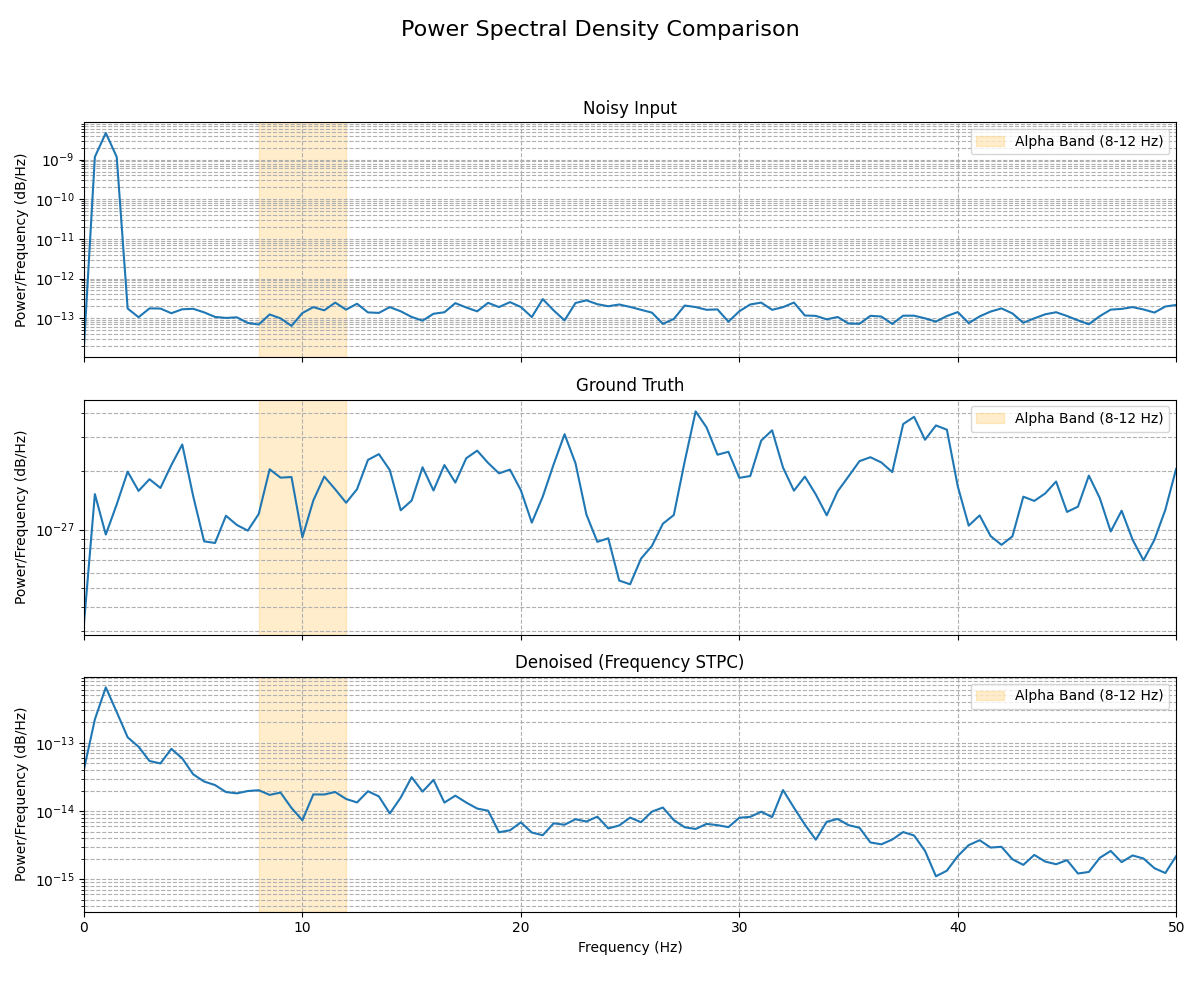


--- Phase 3: UMAP Embedding Plot ---


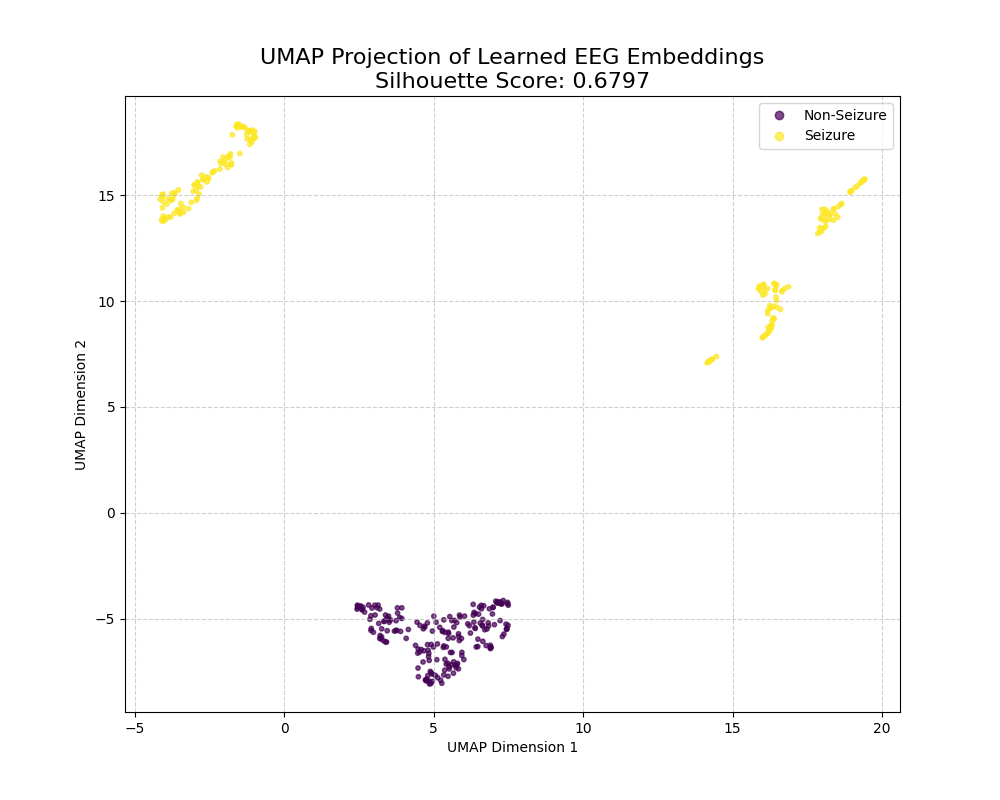


Phase 1 video saved to: /content/drive/MyDrive/ecg_denoiser_hackathon/results2/phase1_spatial_comparison_refactored.mp4


In [ ]:
# --- Phase 3: Unsupervised Validation ---
print("\n--- Validating Phase 3: Unsupervised Discovery ---")
!python3 src/experiments/run_validation.py eeg_unsupervised \
    --model_path "{MODEL_PATH_EEG_SS}" \
    --data_dir "{DATA_DIR_EEG}" \
    --output_path "{OUTPUT_UMAP_PATH}"

print("\n\n✅✅✅ Full EEG Study Complete! ✅✅✅")
print("Displaying final plots:")

if os.path.exists(OUTPUT_PSD_PATH):
    print("\n--- Phase 2: PSD Plot ---")
    display(Image(filename=OUTPUT_PSD_PATH))
else:
    print(f"ERROR: {OUTPUT_PSD_PATH} not found.")

if os.path.exists(OUTPUT_UMAP_PATH):
    print("\n--- Phase 3: UMAP Embedding Plot ---")
    display(Image(filename=OUTPUT_UMAP_PATH))
else:
    print(f"ERROR: {OUTPUT_UMAP_PATH} not found.")

print(f"\nPhase 1 video saved to: {OUTPUT_VIDEO_PATH}")